#The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
Explore and analyze the data to discover key factors responsible for app engagement and success.

#Problem Statements

1. Number of Paid Apps & Free Apps
2. From the Content Rating column which category apps are found more on playstore ?
3. Top categories Apps on Google Playstore?
4. Percentage of apps in each category in the playstore
5. Average rating of the apps
6. Most number of installs App's in Google play sore?
7. What are the Top 10 installed apps ?
8. Top Free apps

#Exploring Play store data:

In [ ]:
#import library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from datetime import datetime
# plotly
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
#sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")

#Explore play store DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read csv file
file_path = '/content/Play Store Data.csv'
ps_df=pd.read_csv(file_path)

In [ ]:
# Display the Play Store App data
play_store=pd.concat([ps_df.head(),ps_df.tail()])
play_store


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:

# Finding the number of rows and columns in the given dataset
print(ps_df.columns)
rows=ps_df.shape[0]
columns=ps_df.shape[1]
print(f"the no of rows is {rows} and no of columns is {columns}")


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
the no of rows is 10841 and no of columns is 13


In [ ]:
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**#Let us first define what information the columns contain based on our inspection.**

play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:

#**Cleaning of the data**

In [ ]:
# This user define function will give the type,count of null and non null values as well as null ratio
def playstoreinfo():
  temp=pd.DataFrame(index=ps_df.columns)
  temp["datatype"]=ps_df.dtypes
  temp["not null values"]=ps_df.count()
  temp["null value"]=ps_df.isnull().sum()
  temp["% of the null value"]=ps_df.isnull().mean()
  temp["unique count"]=ps_df.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10841,0,0.000000,9660
Category,object,10841,0,0.000000,34
Rating,float64,9367,1474,0.135965,40
Reviews,object,10841,0,0.000000,6002
Size,object,10841,0,0.000000,462
Installs,object,10841,0,0.000000,22
Type,object,10840,1,0.000092,3
Price,object,10841,0,0.000000,93
Content Rating,object,10840,1,0.000092,6
Genres,object,10841,0,0.000000,120


**1). Android Ver: There are a total of 3 NaN values in this column.**

In [ ]:

# The rows containing NaN values in the Android Ver column
ps_df[ps_df["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# Finding the different values the 'Android Ver' column takes
ps_df["Android Ver"].value_counts()


4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [ ]:
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column.
ps_df=ps_df[ps_df['Android Ver'].notna()]
# Shape of the updated dataframe
ps_df.shape


(10838, 13)

**2) Current Ver: There are a total of 8 NaN values in this column**

In [ ]:
# The rows containing NaN values in the Current Ver column
ps_df[ps_df["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
# Finding the different values the 'Current Ver' column takes
ps_df['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    263
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

**3) Type: There is only one NaN value in this column.**

In [ ]:
# The row containing NaN values in the Type column
ps_df[ps_df["Type"].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
# Finding the different values the 'Type' column takes
ps_df["Type"].value_counts()

Free    10038
Paid      799
Name: Type, dtype: int64

The Type column contains only two entries, namely, Free and Paid. Also, if the app is of type-paid, the price of that app will be printed in the corresponding Price column, else, it will show as '0'. In this case, the price for the respective app is printed as '0', which means the app is of type-free. Hence we can replace this NaN value with Free.

In [ ]:
# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Free'
ps_df.loc[9148,'Type']='Free'


In [ ]:
ps_df[ps_df["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


**4) Rating: This column contains 1470 NaN values**

In [ ]:
# The rows containing NaN values in the Rating column
ps_df[ps_df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Also, we know that the rating of any app in the play store will be in between 1 and 5. Lets check whether there are any ratings out of this range.

In [ ]:
ps_df[(ps_df['Rating'] <1) | (ps_df['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:

# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = round(ps_df[~ps_df['Rating'].isnull()]['Rating'].mean(),4)

median_rating = ps_df[~ps_df['Rating'].isnull()]['Rating'].median()

[mean_rating , median_rating]


[4.1917, 4.3]

In [ ]:
# Replacing the NaN values in the 'Rating' colunm with its median value
ps_df['Rating'].fillna(value=median_rating,inplace=True)

#**Data Manipulating dataset & Handling duplicates values:**

##**a) Handling the duplicates in the App column**

In [ ]:
# Handling the error values in the Play store data
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
ps_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
8 Ball Pool                                           7
Candy Crush Saga                                      7
                                                     ..
U-Craft Mobile                                        1
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9657, dtype: int64

In [ ]:
# Inspecting the duplicates values.
ps_df[ps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
ps_df[ps_df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [ ]:
# dropping duplicates from the 'App' column.
ps_df.drop_duplicates(subset = 'App', inplace = True)
ps_df.shape

(9657, 13)

In [ ]:
# Checking whether the duplicates in the 'App' column are taken care of or not
ps_df[ps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


##**2) Changing the datatype of the Last Updated column from string to datetime**

In [ ]:
# Pandas to_datetime() function applied to the values in the last updated column helps to convert string Date time into Python Date time object.
ps_df["Last Updated"] = pd.to_datetime(ps_df['Last Updated'])
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


##**3) Changing the datatype of thePrice column from string to float**

In [ ]:
ps_df['Price'].value_counts()

0          8902
$0.99       145
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [ ]:
# Creating a function drop-dollar which dropps the $ symbol if it is present and returns the output which is of float datatype.
def convert_dollar(val):
  '''
  This funtion drops the $ symbol if present and returns the value with float datatype.
  '''
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

In [ ]:
# The drop_dollar funtion applied to the price column
ps_df['Price']=ps_df['Price'].apply(lambda x: convert_dollar(x))
ps_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
ps_df[ps_df['Price']!=0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up


We have successfully converted the datatype of values in the Price column from string to float.

##**4) Converting the values in theInstallscolumn from string datatype to integer datatype**

In [ ]:
# Checking the contents of the 'Installs' column
ps_df['Installs'].value_counts()


1,000,000+        1417
100,000+          1112
10,000+           1030
10,000,000+        937
1,000+             887
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [ ]:
# Creating a function convert_plus which drops the '+' symbol if it is present and returns the output which is of integer datatype.

def convert_plus(val):
  '''
  This function drops the + symbol if present and returns the value with int datatype.
  '''
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)


In [ ]:
# The drop_plus funtion applied to the main dataframe

ps_df['Installs'] = ps_df['Installs'].apply(lambda x: convert_plus(x))
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


##**5) Converting the values in theSizecolumn to a same unit of measure(MB).**

In [ ]:
ps_df['Size'].value_counts()

Varies with device    1227
11M                    181
12M                    181
14M                    177
13M                    177
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

We can see that the values in the Size column contains data with different units. 'M' stands for MB and 'k' stands for KB. To easily analyse this column, it is necessary to convert all the values to a single unit. In this case, we will convert all the units to MB.

We know that 1MB = 1024KB, to convert KB to MB, we must divide all the values which are in KB by 1024.

In [ ]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.

def convert_kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

Applying the kb_to_mb function to convert the values in the Size column to a single unit of measure (MB) and the datatype from string to float.

In [ ]:
# The kb_to_mb funtion applied to the size column

ps_df['Size'] = ps_df['Size'].apply(lambda x: convert_kb_to_mb(x))
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
ps_df['Size'] = ps_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
ps_df['Size'] = ps_df['Size'].apply(lambda x: float(x))

A vast majority of the entries in the Size column contain the entry Varies with device. Since this entry cannot be used for analysis lets see if it can be imputed with the mean or median value of the entries in this column

In [ ]:
# Finding max, min, mean, and median in the Size column excluding the 'Varies with device' values.

max_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].max()

min_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].min()

mean_size = round(ps_df[ps_df['Size'] != 'Varies with device']['Size'].mean(),4)

median_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].median()

[max_size, min_size, mean_size, median_size]


[100.0, 0.0083, 20.3982, 12.0]

##**6) Converting the datatype of values in theReviewscolumn from string to int.**

In [ ]:
# Converting the datatype of the values in the reviews column from string to int
ps_df['Reviews'] = ps_df['Reviews'].astype(int)
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
ps_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9657.000000,9.657000e+03,8430.000000,9.657000e+03,9657.000000
mean,4.192389,2.166374e+05,20.398181,7.779116e+06,1.099372
std,0.496434,1.831507e+06,21.829338,5.376373e+07,16.853893
min,1.000000,0.000000e+00,0.008300,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.941500e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


We have successfully converted the datatype of the values in the Reviews column from string to int.

#**Exploring User_review dataframe**

In [ ]:
# Reading the userreviews.csv file
file_path = '/content/User Reviews.csv'
ur_df=pd.read_csv(file_path)

In [ ]:
# Checking the top 10 rows of the data

ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# Checking shape and column in dataframe
print(ur_df.columns)
rows=ur_df.shape[0]
columns=ur_df.shape[1]
print(f"the no of rows is {rows} and no of columns is {columns}")


Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
the no of rows is 64295 and no of columns is 5


In [ ]:

def Urinfo():
  temp1=pd.DataFrame(index=ur_df.columns)
  temp1["datatype"]=ur_df.dtypes
  temp1["not null values"]=ur_df.count()
  temp1["null value"]=ur_df.isnull().sum()
  temp1["% of the null value"]=ur_df.isnull().mean().round(4)*100
  temp1["unique count"]=ur_df.nunique()
  return temp1
Urinfo()


,datatype,not null values,null value,% of the null value,unique count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474


#**Handling the NaN and erro values in the User reviews**

In [ ]:
# Finding the total no of NaN values in each column.
ur_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

Lot of NaN values present in this data. We need to analyse these values and see how we can handle them.

In [ ]:
# checking the NaN values in the translated rview column
ur_df[ur_df['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Total of 26868 rows containing NaN values in the Translated_Review column.

**Lets check if there are any exceptions.**

In [ ]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.
ur_df[ur_df['Translated_Review'].isnull() & ur_df['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [ ]:
# Deleting the rows containing NaN values
ur_df = ur_df.dropna()

In [ ]:
# The shape of the updated df
ur_df.shape

(37427, 5)

In [ ]:
# Inspecting the sentiment column
ur_df['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

he values in the Sentiment_Polarity and Sentiment_Subjectivitylooks correct.

#**Data Visualization**

1. **Number of Paid Apps & Free Apps**

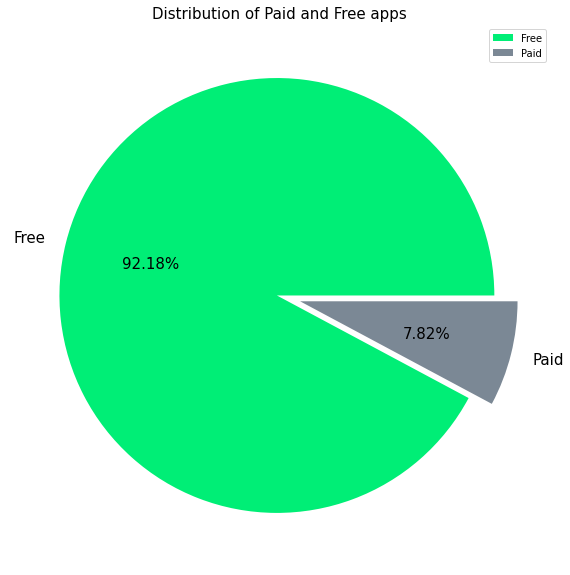

In [ ]:
data = ps_df['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()


From the above graph we can see that 92% of apps in google play store are free and 8%are paid.

In [ ]:
ps_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

**2. From the Content Rating column which category apps are found more on playstore ?**

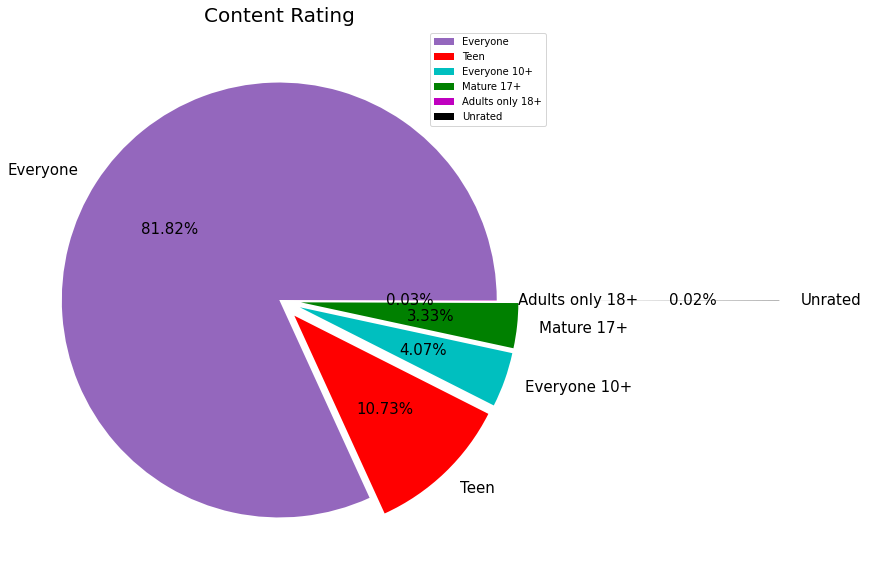

In [ ]:

# Content rating of the apps
data = ps_df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

A majority of the apps (82%) in the play store are can be used by everyone.The remaining apps have various age restrictions to use it.

**3. Top categories Apps on Google Playstore?**

In [ ]:
ps_df.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

In [ ]:
x = ps_df['Category'].value_counts()
y = ps_df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

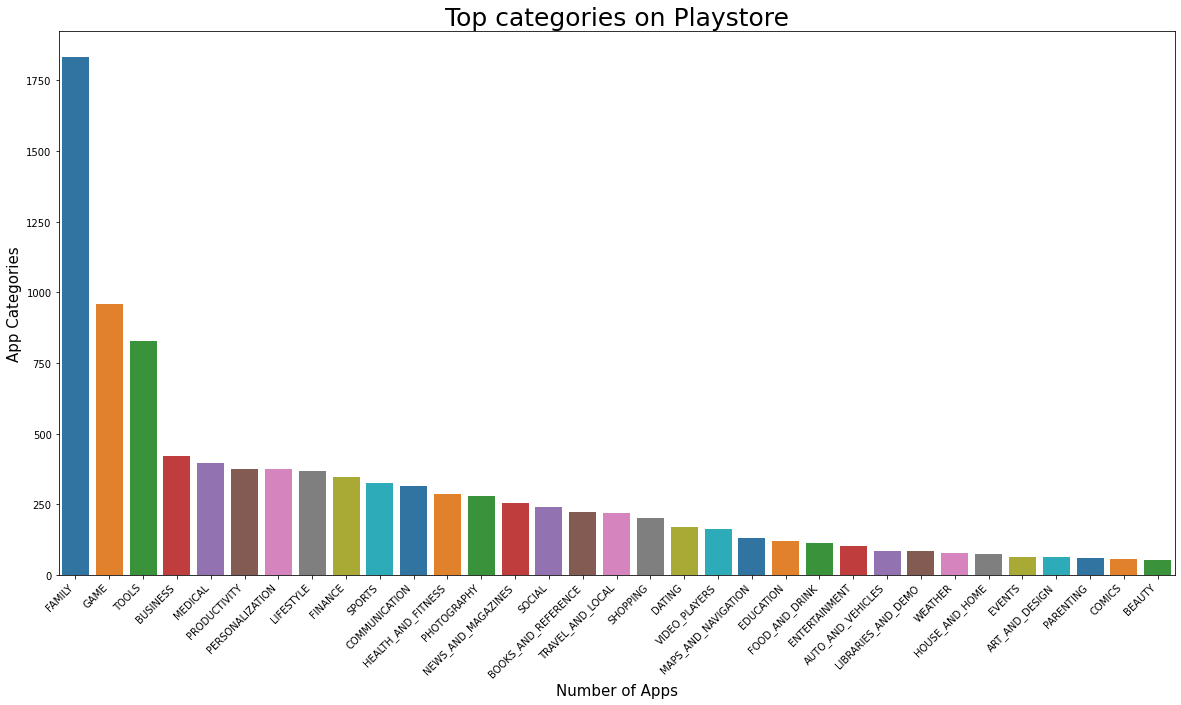

In [ ]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);


4. **Percentage of apps in each category in the playstore**

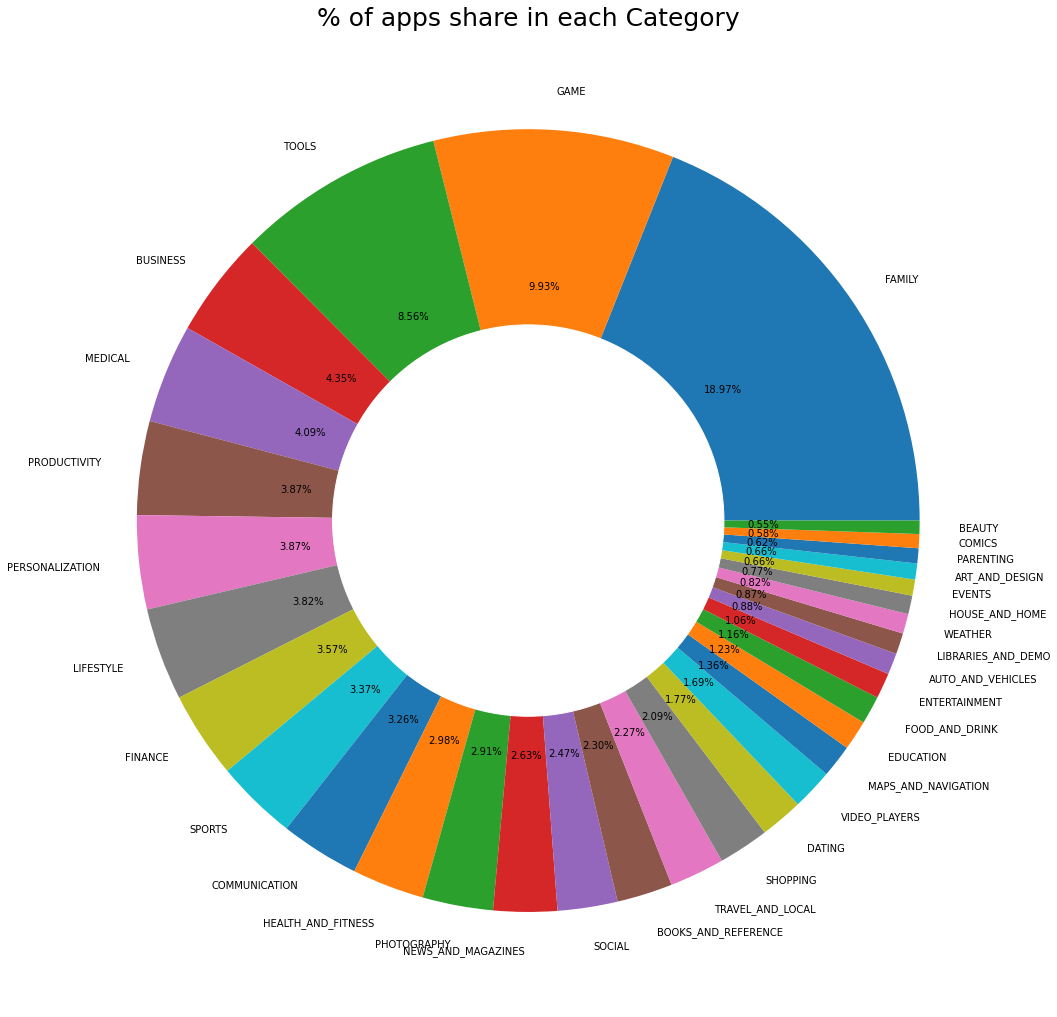

In [ ]:
# Percentage of apps belonging to each category in the playstore
plt.figure(figsize=(18,18))
plt.pie(ps_df.Category.value_counts(), labels=ps_df.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()


**5. Average rating of the apps**

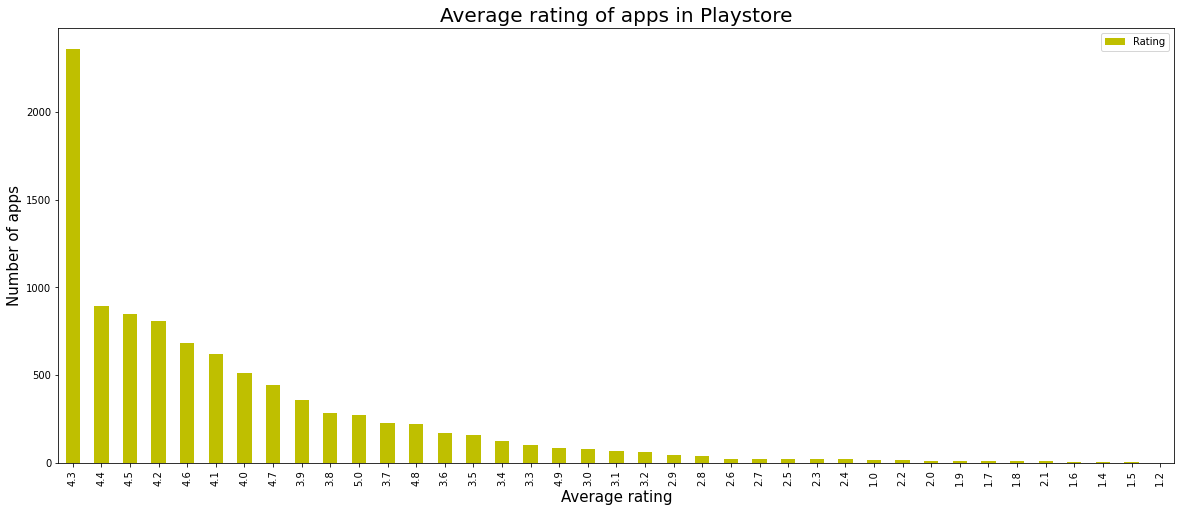

In [ ]:
# Average app ratings

ps_df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'y' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

**6. Most number of installs App's in Google play store?**

Text(0.5, 1.0, 'Total app installs in each category')

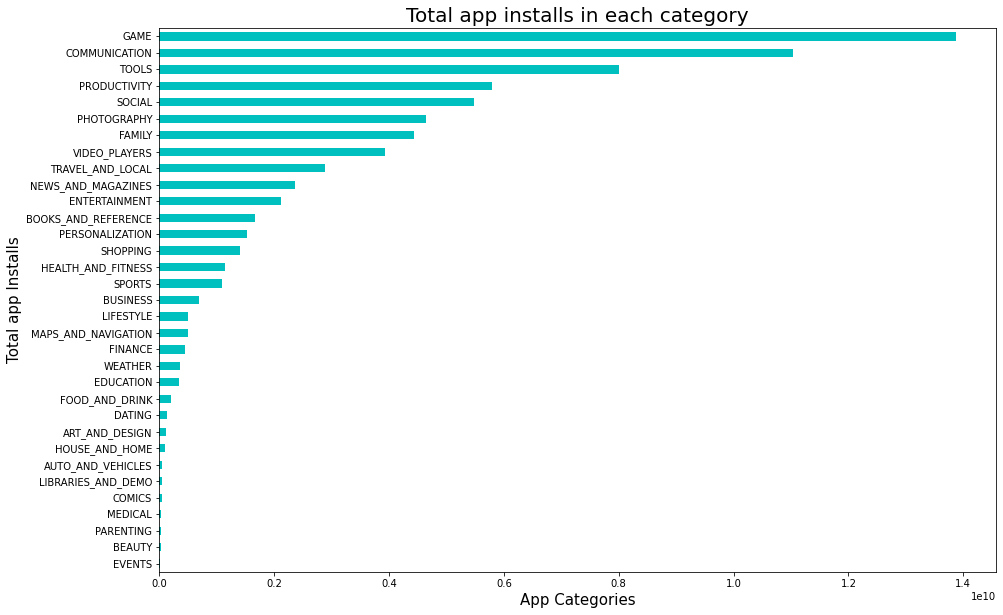

In [ ]:
# total app installs in each category of the play store

a = ps_df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'c', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

**7). What are the Top 10 installed apps ?**

In [ ]:
def findtop10incategory(str):
    str = str.upper()
    top10 = ps_df[ps_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,6), dpi=100)
    plt.title('Top 10 Installed Apps',size = 20)  
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

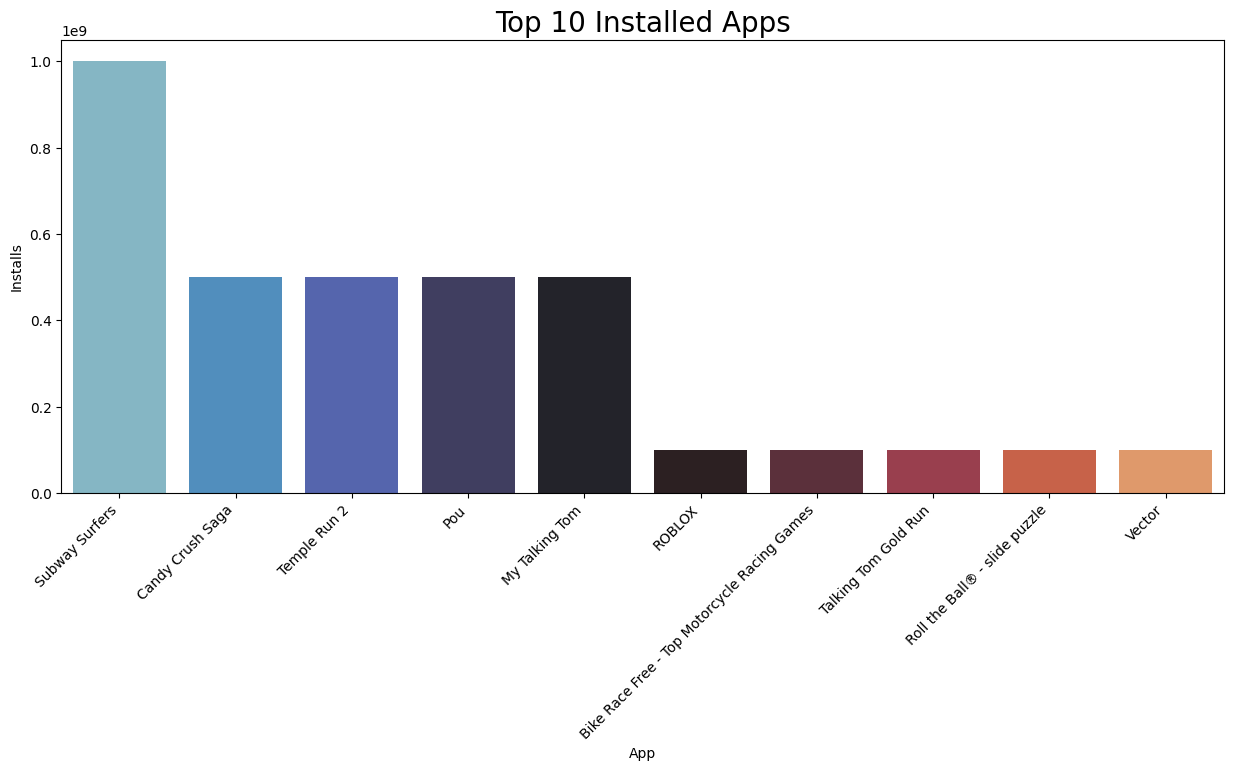

In [ ]:
findtop10incategory('GAME')

**8. Top Free apps** 

In [ ]:
 # Creating a df for only free apps
 
 free_df = ps_df[ps_df['Type'] == 'Free']


In [ ]:
# Creating a df for top free apps

top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]
top10free_apps=top_free_df.nlargest(10, 'Installs', keep='first')
top10free_apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,NaN,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device


In [ ]:
# Top free apps

top_free_df['App']


152                            Google Play Books
335     Messenger – Text and Video Chat for Free
336                           WhatsApp Messenger
338                 Google Chrome: Fast & Secure
340                                        Gmail
341                                     Hangouts
391                Skype - free IM & video calls
865                            Google Play Games
1654                              Subway Surfers
2544                                    Facebook
2545                                   Instagram
2554                                     Google+
2808                               Google Photos
3117                   Maps - Navigate & Explore
3127                          Google Street View
3234                                      Google
3454                                Google Drive
3665                                     YouTube
3687                     Google Play Movies & TV
3736                                 Google News
Name: App, dtype: ob

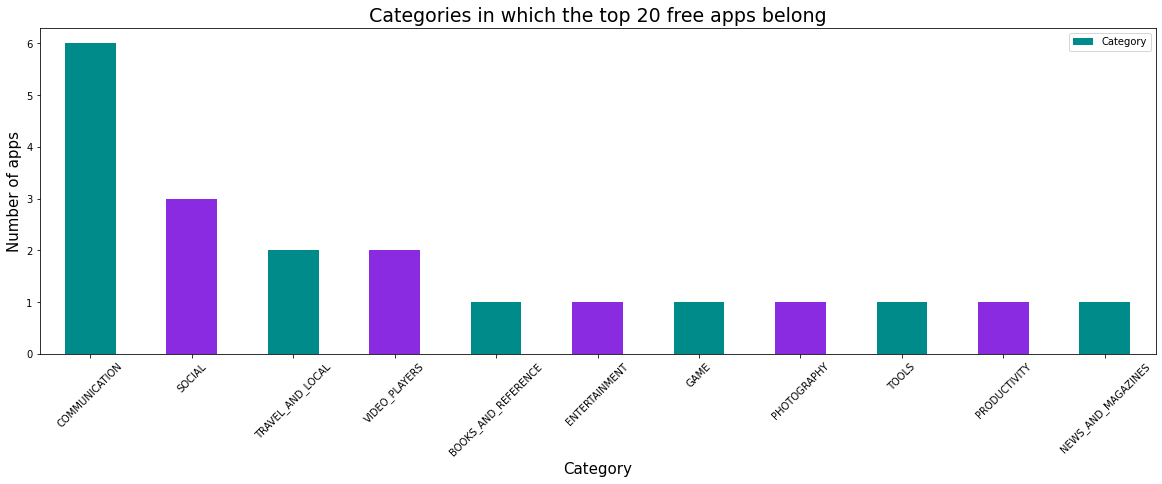

In [ ]:
# Categories in which the top 20 free apps belong to
top_free_df['Category'].value_counts().plot.bar(figsize=(20,6), color= ('darkcyan','blueviolet'))
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top 20 free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()


#**Summary Analysis**

In this project we analyzing play store applications, we have worked on several parameters which would help any organisation to do well in launching their apps on the play store.

1. Percentage of free apps = ~92%
2. In content category ~82% app from Everyone section. 
Most of the apps are Free, so focusing on free app is more important.
3. Family, Game and Tools are top three categories having 1832, 959 and 827 app count. 
4. As per percentage of App in each category is Family, Game and Tools  18.97%, 9.93% & 8.56% .
5. Tops 3 apps which having rating 4.3,4.4,4.5 respectively. 
6. Category with the highest average app installs: Game
7. Subway Surfers have a number one top installed app in the google playstore.
